In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani

from ipywidgets import interactive, fixed, FloatSlider, HBox, Layout, Button, Label, Output, VBox
from IPython.display import display, clear_output

%matplotlib inline

## N-Body Simulation Functions

In [2]:
def forceMagnitude(m1,m2,r):
    G = 6.67408e-11    # m3 kg-1 s-2
    return G * m1 * m2 / r**2 # N

def magnitude(vector):
    return np.sqrt(np.sum(vector**2))

def unitDirectionVector(x,y):
    separation = y - x
    return separation/magnitude(separation)

def forceVector(m1,m2,x,y):
    distance = magnitude(x - y)
    force = forceMagnitude(m1,m2,distance)
    direction = unitDirectionVector(x,y)
    return force*direction 

def calculateForceVectors(masses, positions):
    N = len(positions)
    forcevectors = []

    for i in range(N):
        vector = np.zeros(3)
        for j in range(N):
            if j != i:
                vector += forceVector(masses[i], masses[j], positions[i], positions[j])
        forcevectors.append(vector)
    
    return forcevectors

def updateParticles(masses, positions, velocities, dt):
    startingPositions = np.array(positions)
    startingVelocities = np.array(velocities)
    
    nParticles, nDimensions = startingPositions.shape
    
    assert(startingVelocities.shape == startingPositions.shape)
    assert(len(masses) == nParticles)

    startingForces = np.array(calculateForceVectors(masses, startingPositions))
        
    startingAccelerations = startingForces/np.array(masses).reshape(nParticles, 1)
    
    nudge = startingVelocities*dt + 0.5*startingAccelerations*dt**2
    endingPositions = startingPositions + nudge

    endingForces = np.array(calculateForceVectors(masses, endingPositions))

    endingAccelerations = endingForces/np.array(masses).reshape(nParticles, 1)

    endingVelocities = (startingVelocities +
                        0.5*(endingAccelerations + startingAccelerations)*dt)

    return endingPositions, endingVelocities

def calculateTrajectories(masses, initialPositions, initialVelocities, totalTime, dt):

    newPositions = [initialPositions]
    newVelocities = [initialVelocities]
    nTimes = [0]
    
    lastPosition = np.array(initialPositions)
    lastVelocity = np.array(initialVelocities)
    
    trackTime = 0
        
    while trackTime < totalTime:
        
        calcParticles = updateParticles(masses, lastPosition, lastVelocity, dt)
        trackTime += dt
        
        lastPosition = calcParticles[0]
        lastVelocity = calcParticles[1]
        newPositions.append(lastPosition)
        newVelocities.append(lastVelocity)
        nTimes.append(trackTime)
     
    newPositions = np.array(newPositions)        
    newVelocities = np.array(newVelocities)
    nTimes = np.array(nTimes)
    
    return newPositions, newVelocities, nTimes

## Inner Solar System only

In [3]:
# Inner Solar System Parameters
au = 1.496e11
massSun = 1.989e30
massesSolarSystem = [massSun,   # Sun              # in kg
                     3.285e23,  # Mercury
                     4.867e24,  # Venus
                     5.972e24,  # Earth
                     6.390e23]  # Mars

positionsSolarSystem = [np.array([-3e-6, 0.0, 0.0])*au,   # Sun      # converted to meters
                        np.array([0.39,  0.0, 0.0])*au,   # Mercury
                        np.array([0.723, 0.0, 0.0])*au,   # Venus
                        np.array([1.000, 0.0, 0.0])*au,   # Earth
                        np.array([1.524, 0.0, 0.0])*au]   # Mars

velocitiesSolarSystem = [np.array([0.0, -8.94e-2, 0.0]),  # Sun     # in m/s
                         np.array([0.0,  4.787e4, 0.0]),  # Mercury
                         np.array([0.0,  3.502e4, 0.0]),  # Venus
                         np.array([0.0,  2.978e4, 0.0]),  # Earth
                         np.array([0.0,  2.408e4, 0.0])]  # Mars

In [4]:
dt = 1 * 24 * 3600                  # days converted to seconds
totalTime = 10 * 365 * 24 * 3600    # years converted to seconds

trajectoriesSolarSystem = calculateTrajectories(massesSolarSystem, positionsSolarSystem, velocitiesSolarSystem, totalTime, dt)
#print(trajectoriesSolarSystem)

In [5]:
# Extract position and time from function and convert it to au and days
nPositions = trajectoriesSolarSystem[0] / au
nTimes = trajectoriesSolarSystem[2] / (3600*24)

# Extract x-position of Sun and Planets
xPositionSun = []
xPositionMercury = []
xPositionVenus = []
xPositionEarth = []
xPositionMars = []
for sun,mercury,venus,earth,mars in nPositions:
    xPositionSun.append(sun[0])
    xPositionMercury.append(mercury[0])
    xPositionVenus.append(venus[0])
    xPositionEarth.append(earth[0])
    xPositionMars.append(mars[0])
# convert to array 
xPositionSun = np.array(xPositionSun)
xPositionMercury = np.array(xPositionMercury)
xPositionVenus = np.array(xPositionVenus)
xPositionEarth = np.array(xPositionEarth)
xPositionMars = np.array(xPositionMars)

# Extract y-position of Sun and Planets
yPositionSun = []
yPositionMercury = []
yPositionVenus = []
yPositionEarth = []
yPositionMars = []
for sun,mercury,venus,earth,mars in nPositions:
    yPositionSun.append(sun[1])
    yPositionMercury.append(mercury[1])
    yPositionVenus.append(venus[1])
    yPositionEarth.append(earth[1])
    yPositionMars.append(mars[1])
# convert to array 
yPositionSun = np.array(yPositionSun)
yPositionMercury = np.array(yPositionMercury)
yPositionVenus = np.array(yPositionVenus)
yPositionEarth = np.array(yPositionEarth)
yPositionMars = np.array(yPositionMars)

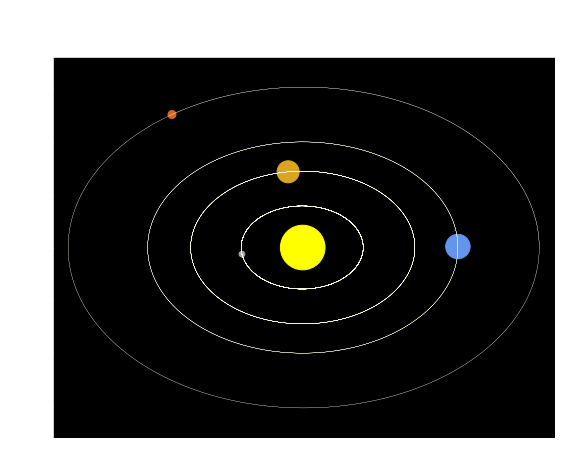

In [6]:
# masses for plotting
areaSolarSystem = []
for m in massesSolarSystem:
    area = 1.0e-22 * m
    areaSolarSystem.append(area)
areaSolarSystem = np.array(areaSolarSystem)

# mass of sun for plotting
areaSolarSystem[0] = 1.0e-27 * massSun

# create a movie write object, set frame rate
writer = ani.FFMpegWriter(fps=25)

# create a figure
fig = plt.figure(figsize=(9,7))
plt.style.use('dark_background')

# extract position and time from calculated trajectories and convert them to AU and days
positionSolarSystem = trajectoriesSolarSystem[0] / au
timeSolarSystem = trajectoriesSolarSystem[2] / (3600*24)

# find min and max
xmin = np.min(positionSolarSystem[:,:,0])
xmax = np.max(positionSolarSystem[:,:,0])
ymin = np.min(positionSolarSystem[:,:,2])
ymax = np.max(positionSolarSystem[:,:,2])

# set things up to save frames to a movie:
#   fig = the figure the writer will record from
with writer.saving(fig, 'InnerSolarSystem.mp4', 100):
    for time,position in zip(timeSolarSystem,positionSolarSystem):
        
        # clear the previous plot
        plt.cla()
        
        plt.plot(xPositionMercury,yPositionMercury, label="Mercury's orbit", color="beige", linestyle=':', linewidth=0.2)
        plt.plot(xPositionVenus,yPositionVenus, label="Venus's orbit", color="beige", linestyle=':', linewidth=0.2)
        plt.plot(xPositionEarth,yPositionEarth, label="Earth's orbit", color="beige", linestyle=':', linewidth=0.2)
        plt.plot(xPositionMars,yPositionMars, label="Mars's orbit", color="beige", linestyle=':', linewidth=0.2)
        
        plt.scatter(position[:,0], position[:,1], color=['yellow',
                                                         'darkgrey',
                                                         'goldenrod',
                                                         'cornflowerblue',
                                                         'chocolate'], s=areaSolarSystem)
        plt.suptitle('Inner Solar System')
        plt.title('Day #{}'.format(time))
        plt.xlabel('x (AU)')
        plt.ylabel('y (AU)')
        plt.xlim(xmin-0.1,xmax+0.1)
        plt.ylim(-1.8,1.8)
    
        # save the current plot as a movie frame
        writer.grab_frame()

## Widget

In [7]:
"""# masses for plotting
areaSolarSystem = []
for m in massesSolarSystem:
    area = 1.0e-22 * m
    areaSolarSystem.append(area)
areaSolarSystem = np.array(areaSolarSystem)

# mass of sun for plotting
areaSolarSystem[0] = 1.0e-27 * massSun

# animation function 
def animate(i): 
    for time,position in zip(timeSolarSystem,positionSolarSystem):
        # Plot
        fig = plt.figure(figsize=(9,7)) 

        # clear the previous plot
        plt.cla()

        plt.plot(xPositionMercury,yPositionMercury, label="Mercury's orbit", color="beige", linestyle=':')
        plt.plot(xPositionVenus,yPositionVenus, label="Venus's orbit", color="beige", linestyle=':')
        plt.plot(xPositionEarth,yPositionEarth, label="Earth's orbit", color="beige", linestyle=':')
        plt.plot(xPositionMars,yPositionMars, label="Mars's orbit", color="beige", linestyle=':')

        plt.scatter(position[:,0], position[:,1], color=['yellow',
                                                         'darkgrey',
                                                         'goldenrod',
                                                         'cornflowerblue',
                                                         'chocolate'], s=areaSolarSystem)
        plt.suptitle('Inner Solar System')
        plt.title('Day #{}'.format(time))
        plt.xlabel('x (AU)')
        plt.ylabel('y (AU)')
        plt.xlim(-1.8,1.8)
        plt.ylim(-1.8,1.8)     

# call the animator
def f(MSun):
    anim = ani.FuncAnimation(fig, animate, frames=200, interval=10, blit=True)
    plt.show()

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-7-1263b607358f>, line 40)

In [ ]:
"""# Appearance
style = {'description_width': 'initial'}
layout = {'width':'600px'}

# Define slides
MSun = FloatSlider(min=0, max=1e35, step=1e5, 
                    value=massSun, 
                    description='Mass of Sun (in kg)', 
                    readout_format='.2e', 
                    orientation='horizontal', 
                    style=style, layout=layout)

# Interactive widget
def interactive_plot(f):
    interact = interactive(f, MSun = MSun,
                               continuous_update=False)
    return interact

# Button to revert back to Best Fit
button = Button(
    description="Real Mass of Sun",
    button_style='warning', # 'success', 'info', 'warning', 'danger' or ''
    icon='check')
out = Output()

def on_button_clicked(_):
    MSun.value = massSun

button.on_click(on_button_clicked)

# displaying button and its output together
VBox([button,out,interactive_plot(f)])

## Solar System (inner and outer planets)

In [ ]:
"""# All of the Solar System 
au = 1.496e11
massSun = 1.989e30       # in kg
massesFullSolarSystem = [massSun,   # Sun              # in kg
                         3.285e23,  # Mercury
                         4.867e24,  # Venus
                         5.972e24,  # Earth
                         6.390e23,  # Mars
                         1.898e27,  # Jupiter
                         5.683e26,  # Saturn
                         8.681e25,  # Uranus
                         1.024e26,  # Neptune
                         1.309e22]  # Pluto

positionsFullSolarSystem = [np.array([-3e-6, 0.0, 0.0])*au,   # Sun      # converted to meters
                            np.array([0.39,  0.0, 0.0])*au,   # Mercury
                            np.array([0.723, 0.0, 0.0])*au,   # Venus
                            np.array([1.000, 0.0, 0.0])*au,   # Earth
                            np.array([1.524, 0.0, 0.0])*au,   # Mars
                            np.array([5.203, 0.0, 0.0])*au,   # Jupiter
                            np.array([9.539, 0.0, 0.0])*au,   # Saturn
                            np.array([19.18, 0.0, 0.0])*au,   # Uranus
                            np.array([30.06, 0.0, 0.0])*au,   # Neptune
                            np.array([39.53, 0.0, 0.0])*au]   # Pluto  

velocitiesFullSolarSystem = [np.array([0.0, -8.94e-2, 0.0]),  # Sun     # in m/s
                         np.array([0.0,  4.787e4, 0.0]),  # Mercury
                         np.array([0.0,  3.502e4, 0.0]),  # Venus
                         np.array([0.0,  2.978e4, 0.0]),  # Earth
                         np.array([0.0,  2.408e4, 0.0]),  # Mars
                         np.array([0.0,  1.307e4, 0.0]),  # Jupiter
                         np.array([0.0,  9.690e3, 0.0]),  # Saturn
                         np.array([0.0,  6.810e3, 0.0]),  # Uranus
                         np.array([0.0,  5.430e3, 0.0]),  # Neptune
                         np.array([0.0,  4.740e3, 0.0])]  # Pluto

In [ ]:
"""dt2 = 100 * 24 * 3600                # days converted to seconds
totalTime2 = 100 * 365 * 24 * 3600   # years converted to seconds

trajectoriesFullSolarSystem = calculateTrajectories(massesFullSolarSystem, positionsFullSolarSystem, velocitiesFullSolarSystem, totalTime2, dt2)
#print(trajectoriesFullSolarSystem)

In [ ]:
"""# Extract position and time from function and convert it to au and seconds
nPositions2 = trajectoriesFullSolarSystem[0] / au
nTimes2 = trajectoriesFullSolarSystem[2] / (3600*24)

# Extract x-position of Sun and Planets
xPositionSun2 = []
xPositionMercury2 = []
xPositionVenus2 = []
xPositionEarth2 = []
xPositionMars2 = []
xPositionJupiter2 = []
xPositionSaturn2 = []
xPositionUranus2 = []
xPositionNeptune2 = []
xPositionPluto2 = []
for sun,mercury,venus,earth,mars,jupiter,saturn,uranus,neptune,pluto in nPositions2:
    xPositionSun2.append(sun[0])
    xPositionMercury2.append(mercury[0])
    xPositionVenus2.append(venus[0])
    xPositionEarth2.append(earth[0])
    xPositionMars2.append(mars[0])
    xPositionJupiter2.append(jupiter[0])
    xPositionSaturn2.append(saturn[0])
    xPositionUranus2.append(uranus[0])
    xPositionNeptune2.append(neptune[0])
    xPositionPluto2.append(pluto[0])
# convert to array 
xPositionSun2 = np.array(xPositionSun2)
xPositionMercury2 = np.array(xPositionMercury2)
xPositionVenus2 = np.array(xPositionVenus2)
xPositionEarth2 = np.array(xPositionEarth2)
xPositionMars2 = np.array(xPositionMars2)
xPositionJupiter2 = np.array(xPositionJupiter2)
xPositionSaturn2 = np.array(xPositionSaturn2)
xPositionUranus2 = np.array(xPositionUranus2)
xPositionNeptune2 = np.array(xPositionNeptune2)
xPositionPluto2 = np.array(xPositionPluto2)

# Extract y-position of Sun and Planets
yPositionSun2 = []
yPositionMercury2 = []
yPositionVenus2 = []
yPositionEarth2 = []
yPositionMars2 = []
yPositionJupiter2 = []
yPositionSaturn2 = []
yPositionUranus2 = []
yPositionNeptune2 = []
yPositionPluto2 = []
for sun,mercury,venus,earth,mars,jupiter,saturn,uranus,neptune,pluto in nPositions2:
    yPositionSun2.append(sun[1])
    yPositionMercury2.append(mercury[1])
    yPositionVenus2.append(venus[1])
    yPositionEarth2.append(earth[1])
    yPositionMars2.append(mars[1])
    yPositionJupiter2.append(jupiter[1])
    yPositionSaturn2.append(saturn[1])
    yPositionUranus2.append(uranus[1])
    yPositionNeptune2.append(neptune[1])
    yPositionPluto2.append(pluto[1])
# convert to array 
yPositionSun2 = np.array(yPositionSun2)
yPositionMercury2 = np.array(yPositionMercury2)
yPositionVenus2 = np.array(yPositionVenus2)
yPositionEarth2 = np.array(yPositionEarth2)
yPositionMars2 = np.array(yPositionMars2)
yPositionJupiter2 = np.array(yPositionJupiter2)
yPositionSaturn2 = np.array(yPositionSaturn2)
yPositionUranus2 = np.array(yPositionUranus2)
yPositionNeptune2 = np.array(yPositionNeptune2)
yPositionPluto2 = np.array(yPositionPluto2)

In [ ]:
"""# masses for plotting
areaFullSolarSystem = []
for m in massesFullSolarSystem:
    area = 1.0e-25 * m
    areaFullSolarSystem.append(area)
areaFullSolarSystem = np.array(areaFullSolarSystem)

# mass of sun for plotting
areaFullSolarSystem[0] = 1.0e-29 * massSun

# create a movie write object, set frame rate
writer = ani.FFMpegWriter(fps=25)

# create a figure
fig = plt.figure(figsize=(9,7))

# extract position and time from calculated trajectories and convert them to AU and days
positionFullSolarSystem = trajectoriesFullSolarSystem[0] / au
timeFullSolarSystem = trajectoriesFullSolarSystem[2] / (3600*24)

# set things up to save frames to a movie:
#   fig = the figure the writer will record from
with writer.saving(fig, 'SolarSystem.mp4', 100):
    for time,position in zip(timeFullSolarSystem,positionFullSolarSystem):
        
        # clear the previous plot
        plt.cla()
     
        plt.scatter(position[:,0], position[:,1], color=['yellow',
                                                         'darkgrey',
                                                         'goldenrod',
                                                         'cornflowerblue',
                                                         'chocolate',
                                                         'goldenrod',
                                                         'khaki',
                                                         'c',
                                                         'dodgerblue',
                                                         'tan'], s=areaSolarSystem)
        plt.plot(xPositionMercury2,yPositionMercury2, label="Mercury's orbit", color="ivory", linestyle=':')
        plt.plot(xPositionVenus2,yPositionVenus2, label="Venus's orbit", color="ivory", linestyle=':')
        plt.plot(xPositionEarth2,yPositionEarth2, label="Earth's orbit", color="ivory", linestyle=':')
        plt.plot(xPositionMars2,yPositionMars2, label="Mars's orbit", color="ivory", linestyle=':')
        plt.plot(xPositionJupiter2,yPositionJupiter2, label="Jupiter's orbit", color="ivory", linestyle=':')
        plt.plot(xPositionSaturn2,yPositionSaturn2, label="Saturn's orbit", color="ivory", linestyle=':')        
        plt.plot(xPositionUranus2,yPositionUranus2, label="Uranus's orbit", color="ivory", linestyle=':')
        plt.plot(xPositionNeptune2,yPositionNeptune2, label="Neptune's orbit", color="ivory", linestyle=':')
        plt.plot(xPositionPluto2,yPositionPluto2, label="Pluto's orbit", color="ivory", linestyle=':')
        
        plt.suptitle('Solar System')
        plt.title('Day #{}'.format(time))
        plt.xlabel('x (AU)')
        plt.ylabel('y (AU)')
        plt.xlim(-40,40)
        plt.ylim(-40,40)
    
        # save the current plot as a movie frame
        writer.grab_frame()